# Домашнее задание по теме: Нормализация и стандартизация (Normalization & standardization)

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [1]:
!conda install pandas matplotlib numpy seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



In [1]:
import numpy as np

np.__version__

'1.20.2'

In [2]:
import pandas as pd

pd.__version__

'1.2.4'

In [3]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [4]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [5]:
# загрузить датасет в pandas dataframe
df = pd.read_csv('./../../data/hotel_bookings.csv')

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## **ВНИМАНИЕ**

- В ячейках с комментариями необходимо реализовать то, что описывает комментарий.

- Можно выполнить это задание для любого количества колонок, необходимый минимум указан в задании (две конкретные колонки).

- Для выполнения заданий можно использовать любые удобные способы.

- Можно и нужно использовать вспомогательные функции из лекции, но желательно привнести в них что-то от себя. Например, изменить цвет, размер, расположение графиков и т.п. Приветствуются любые изменения.

## Выбор колонок для изучения

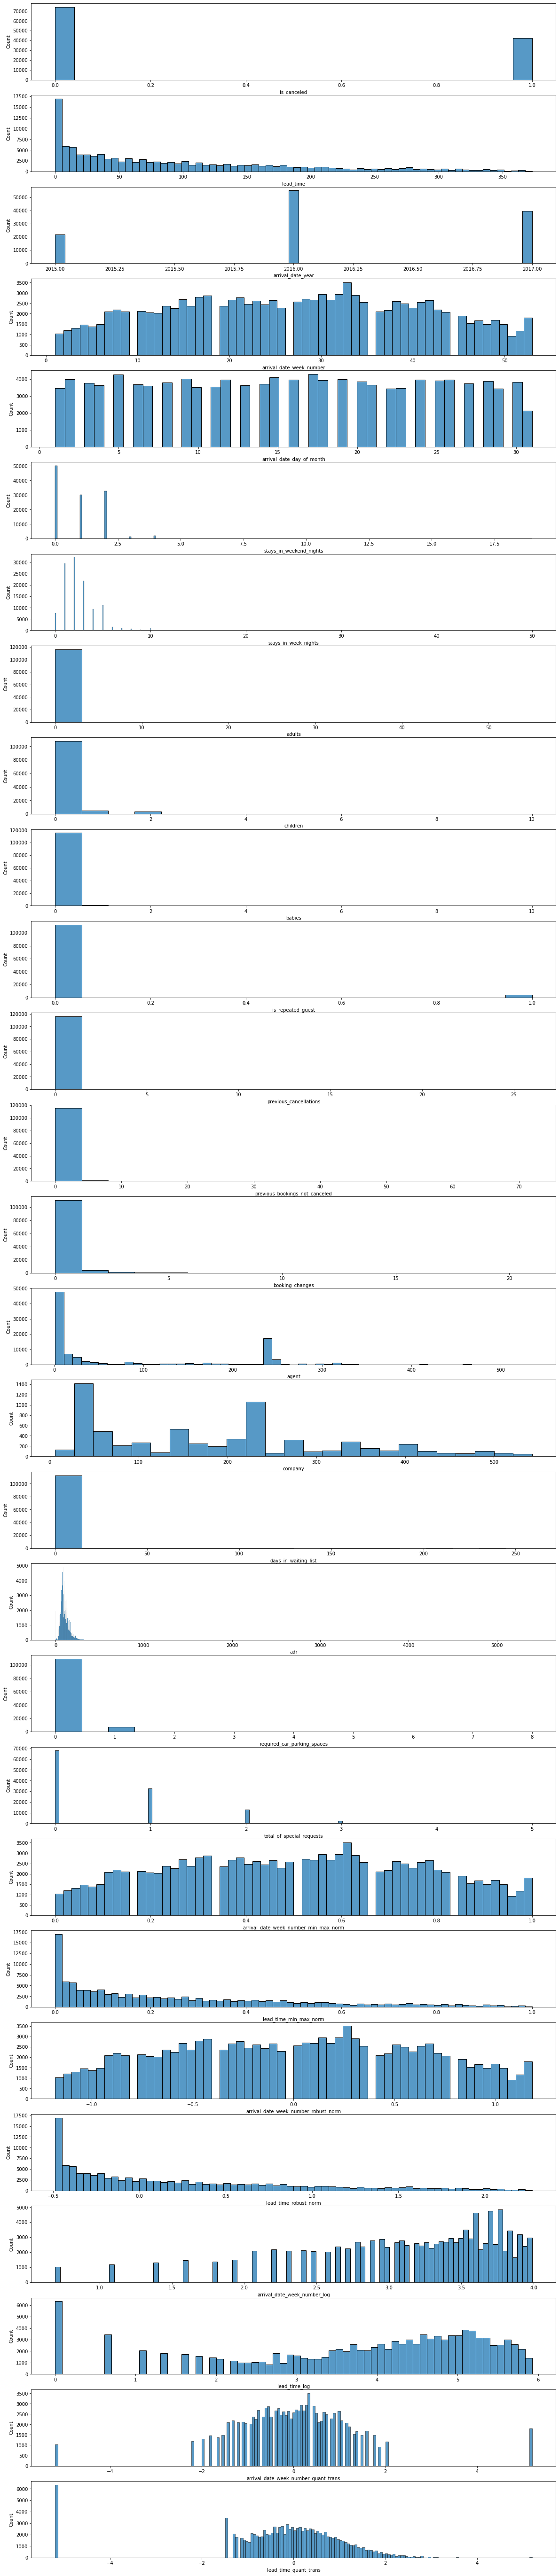

In [45]:
# гистограммы для всех числовых колонок
df_n = df.select_dtypes(include=np.number)
_, axs = plt.subplots(len(df_n.columns), 1, figsize=(20, 100))  

iterator = 0
for i in df_n.columns:   
    sns.histplot(data=df_n[i], ax=axs[iterator])
    iterator = iterator + 1

In [9]:
# выбрать колонки arrival_date_week_number и lead_time
ex_col_names = ['arrival_date_week_number', 'lead_time']

## Удаление выбросов

In [10]:
# функция для удаления выбросов
def remove_outliers_iqr(data, col_name):
    print(f"column name: {col_name}\n")
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    data_new = data[~((data[col_name] < lower_fence) |
                      (data[col_name] > upper_fence))]
    
    diff_len = len(data) - len(data_new)
    print(f"removed: {diff_len}")
    
    _, axs = plt.subplots(2, 1, figsize=(6, 6))
    sns.boxplot(data=data_new[col_name], ax=axs[0])
    sns.histplot(data=data_new[col_name], ax=axs[1])
    
    return data_new.reset_index(drop=True)

column name: arrival_date_week_number

removed: 0
column name: lead_time

removed: 3005


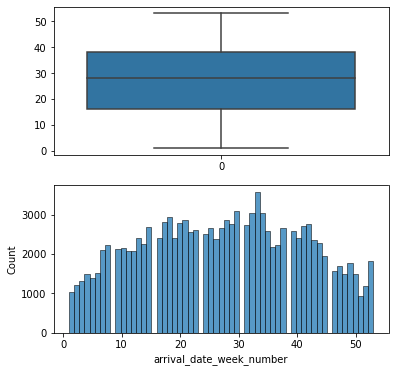

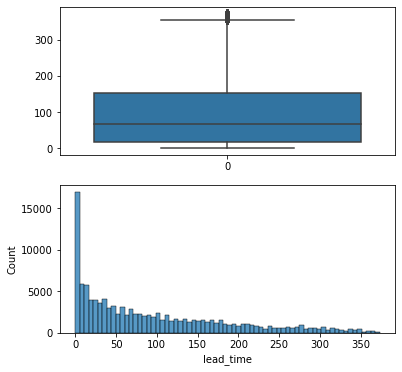

In [11]:
# удалить выбросы из выбранных колонок
df = remove_outliers_iqr(df, ex_col_names[0])
df = remove_outliers_iqr(df, ex_col_names[1])

## Нормализация

### Минимаксная нормализация (`MinMaxScaler`)

Нормализовать выбранные колонки с помощью `MinMaxScaler`.

Нарисовать графики "до-после".

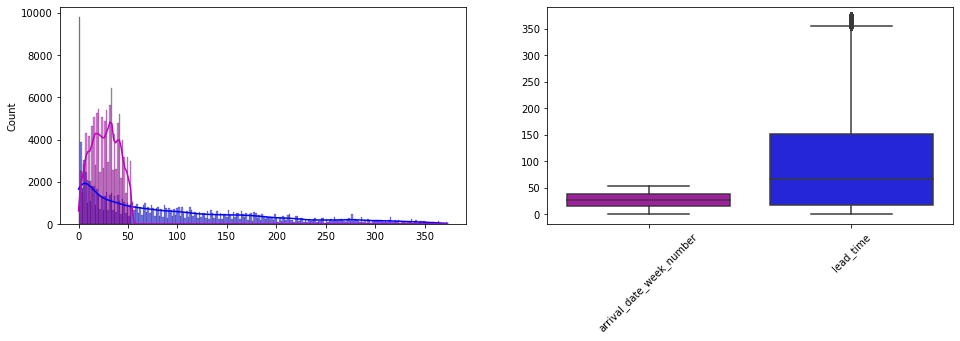

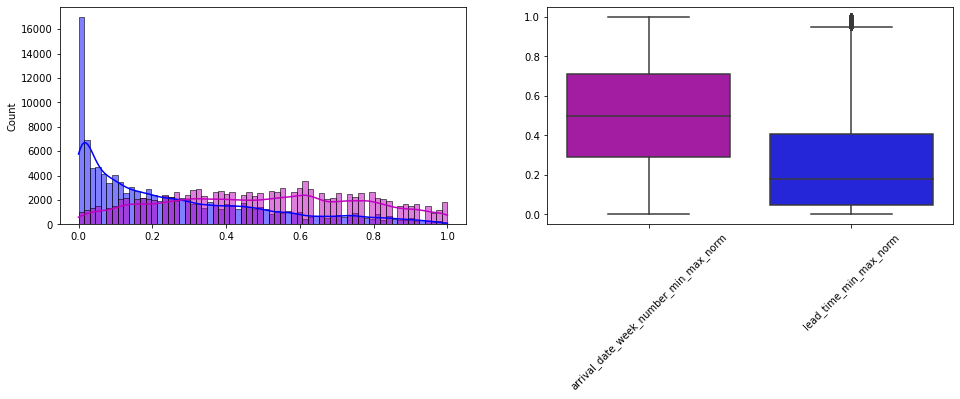

In [12]:
from sklearn.preprocessing import MinMaxScaler

def plot_hist_box(col_names):
    _, axes = plt.subplots(1, 2, figsize=(16, 4))

    sns.histplot(df[col_names], 
                 palette=['m', 'b'], 
                 ax=axes[0], 
                 legend=False, 
                 kde=True)

    bp = sns.boxplot(data=df[col_names], 
                     palette=['m', 'b'], 
                     ax=axes[1], 
                     saturation=0.7)
    bp.set_xticklabels(bp.get_xticklabels(),
                       rotation=45)

def plot_hist_original_new(col_names_original, col_names_new):
    _, axes = plt.subplots(2, 2, figsize=(16, 4))

    sns.histplot(df[col_names_original[0]], 
                 color='m', 
                 ax=axes[0][0], 
                 legend=False, 
                 kde=True)
    
    sns.histplot(df[col_names_new[0]], 
                 color='m', 
                 ax=axes[0][1], 
                 legend=False, 
                 kde=True)
    
    sns.histplot(df[col_names_original[1]], 
                 color='b', 
                 ax=axes[1][0], 
                 legend=False, 
                 kde=True)
    
    sns.histplot(df[col_names_new[1]], 
                 color='b', 
                 ax=axes[1][1], 
                 legend=False, 
                 kde=True)
    
def ex_col_names_with_suffix(suffix):
    return [f"{name}_{suffix}" for name in ex_col_names]

# по умолчанию feature_range=(0, 1)
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

ex_col_names = ['arrival_date_week_number', 'lead_time']

plot_hist_box(ex_col_names)

min_max_scaler.fit(df[ex_col_names])

ex_col_names_min_max_norm = ex_col_names_with_suffix('min_max_norm')

df[ex_col_names_min_max_norm] = min_max_scaler.transform(df[ex_col_names])

df[ex_col_names + ex_col_names_min_max_norm]

plot_hist_box(ex_col_names_min_max_norm)

### Robust scaling

Нормализовать выбранные колонки с помощью `RobustScaler`.

Нарисовать графики "до-после".

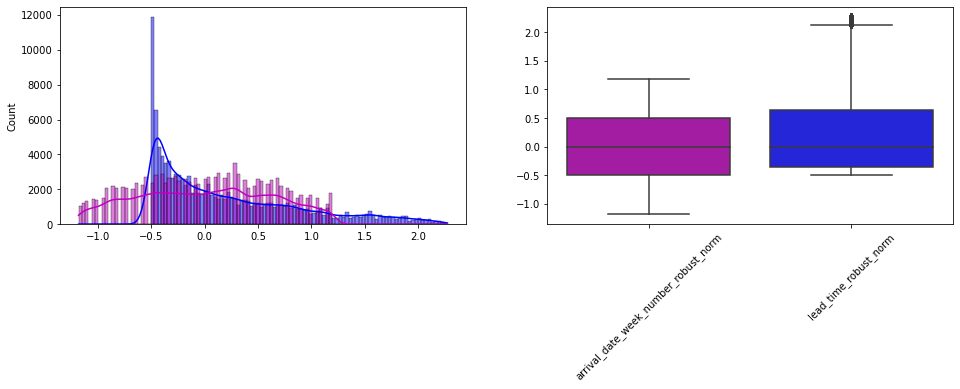

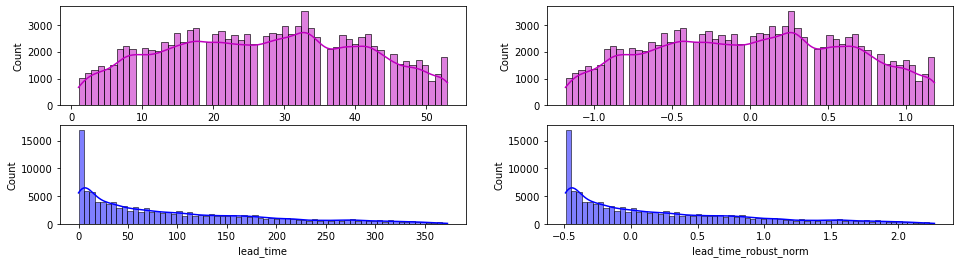

In [13]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

robust_scaler.fit(df[ex_col_names])

ex_col_names_robust_norm = ex_col_names_with_suffix('robust_norm')

df[ex_col_names_robust_norm] = robust_scaler.transform(df[ex_col_names])

df[ex_col_names + ex_col_names_robust_norm]

plot_hist_box(ex_col_names_robust_norm)

plot_hist_original_new(ex_col_names, ex_col_names_robust_norm)

## Стандартизация

### Log Transformation

Стандартизовать выбранные колонки с помощью `log1p`.

Нарисовать графики "до-после".

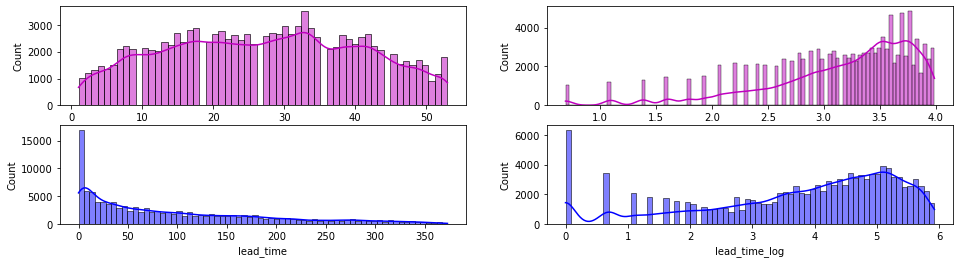

In [14]:
ex_col_names_log = ex_col_names_with_suffix('log')

df[ex_col_names_log] = np.log1p(df[ex_col_names])

df[ex_col_names + ex_col_names_log]

plot_hist_original_new(ex_col_names, ex_col_names_log)

### Квантильный преобразователь (`QuantileTransformer`)

Стандартизовать выбранные колонки с помощью `QuantileTransformer`.

Нарисовать графики "до-после".

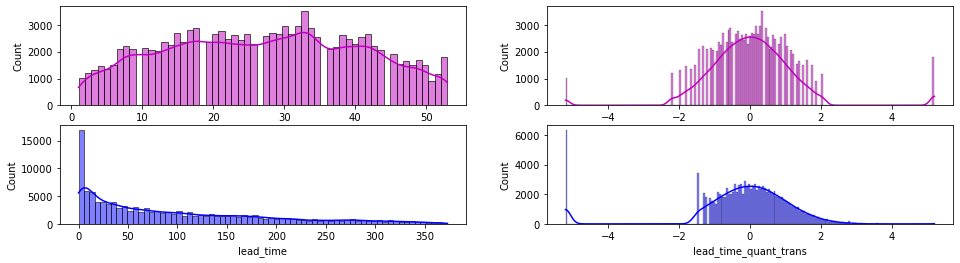

In [15]:
from sklearn.preprocessing import QuantileTransformer

quant_trans = QuantileTransformer(output_distribution='normal')

ex_col_names_quant_trans = ex_col_names_with_suffix('quant_trans')

df[ex_col_names_quant_trans] = quant_trans.fit_transform(df[ex_col_names])

df[ex_col_names + ex_col_names_quant_trans]

plot_hist_original_new(ex_col_names, ex_col_names_quant_trans)